# Data Analysis of FAO Food Price Indices to be Used on Food Cost Trend Data
## By Sydney Balboni 


### Introduction
This notebook will be used to analyze the Monthly Real Food Price Indices released by the United Nations Food and Agriculture Organization (FAO). This data can be found at the [FAO Food Price Index webpage](https://www.fao.org/worldfoodsituation/foodpricesindex/en/). The purpose of this analysis is to determine how helpful these food price indices will be in determining the cost of different food commodities over time.

The overall purpose of this research, and therefore the purpose of accurately determining the ost of different food commodities over time, is to determine future trends for the purpose of warning underdeveloped communities of potential food shortages. This will allow these communities to prepare for these shortages and prevent the loss of life that often accompanies food shortages in nations where people spend a larger proportion of their income on food.

In [14]:
import pandas as pd # for handling the data
import matplotlib.pyplot as plt # for plotting
import numpy as np # for handling numbers

### Part 1: Loading Data

### Part 1.1: Output Variable
The output variable for this analysis will be the international food commodity pricing data by month, divided by both product and country of production. This data is used as a history of commodity pricing -- the value that will be predicted throughout this research -- to understand past trends and better predict future trends. Overlapping input data for specific dates will be used for training.

In [4]:
international_prices = pd.read_csv('International_Price_Data.csv')
international_prices

,Date,"INTERNATIONAL PRICES, EXPORT, Argentina, Maize (Up River), USD/Kg","INTERNATIONAL PRICES, EXPORT, Argentina, Wheat (12%, Up River), USD/Kg","INTERNATIONAL PRICES, EXPORT, Australia, Meat: Bovine (Cow 90CL to US, f.a.s.), USD/Kg","INTERNATIONAL PRICES, EXPORT, Australia, Meat: Ovine (Medium trade lamb 18-20 Kg), USD/Kg","INTERNATIONAL PRICES, EXPORT, Australia (Eastern States), Barley (feed), USD/Kg","INTERNATIONAL PRICES, EXPORT, Australia (Eastern States), Wheat (ASW), USD/Kg","INTERNATIONAL PRICES, EXPORT, Bangladesh, Jute BWD (f.o.b. Mongla, at sight)/from 2006 Jute BTD (f.o.b Bangladesh Port), USD/Kg","INTERNATIONAL PRICES, EXPORT, Black Sea, Barley (feed), USD/Kg","INTERNATIONAL PRICES, EXPORT, Black Sea, Maize (feed), USD/Kg",...,"INTERNATIONAL PRICES, EXPORT, Unspecified, Rape oil (Dutch, f.o.b. ex-mill), USD/Kg","INTERNATIONAL PRICES, EXPORT, Unspecified, Rapeseed (Europe, 00, c.i.f. Hamburg), USD/Kg","INTERNATIONAL PRICES, EXPORT, Unspecified, Rapeseed meal (34%, Hamburg, f.o.b. ex-mill), USD/Kg","INTERNATIONAL PRICES, EXPORT, Unspecified, Soybean meal (44/45%, Hamburg, f.o.b. ex-mill), USD/Kg","INTERNATIONAL PRICES, EXPORT, Unspecified, Soybean oil (Dutch, f.o.b. ex-mill), USD/Kg","INTERNATIONAL PRICES, EXPORT, Unspecified, Sunflower oil (f.o.b. North West European Ports), USD/Kg","INTERNATIONAL PRICES, EXPORT, Unspecified, Sunflowerseed (EU, c.i.f. Amsterdam), USD/Kg","INTERNATIONAL PRICES, EXPORT, Uruguay, Rice (5% broken, long grain white, f.o.b., f.c.l.), USD/Kg","INTERNATIONAL PRICES, EXPORT, Viet Nam, Rice (25% broken), USD/Kg","INTERNATIONAL PRICES, EXPORT, Viet Nam, Rice (5% broken), USD/Kg"
0,11/01/2023,0.21320,0.25100,5.03689,2.72948,0.25185,0.27645,NaN,0.17495,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.77425,0.6080,0.63825
1,10/01/2023,0.22140,0.30420,5.13597,2.67446,0.25800,0.29632,0.71,0.17223,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.74425,0.5890,0.60150
2,09/01/2023,0.23670,0.31305,5.17345,3.16106,0.25667,0.29829,0.73,0.18810,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.73060,0.5870,0.60540
3,08/01/2023,0.22084,0.32176,5.02350,3.14367,0.24278,0.29365,0.70,0.18843,NaN,...,1.040,0.487,0.322,0.495,1.127,0.979,0.498,0.69725,0.5875,0.61425
4,07/01/2023,0.22740,0.33570,5.03421,3.33090,0.23433,0.29090,0.85,0.17733,0.1988,...,1.084,0.507,0.334,0.517,1.133,1.050,0.481,0.63425,0.4790,0.50400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,05/01/1990,NaN,NaN,2.25060,1.52462,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,04/01/1990,NaN,NaN,2.28440,1.44944,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,03/01/1990,NaN,NaN,2.27153,1.32313,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,02/01/1990,NaN,NaN,2.29281,1.37325,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Given each column is a country's individual food commodity market
commodity_item_trends = {} # {commodity: {country: prices df w/ date}}

for i,column_name in enumerate(international_prices.columns):
    if i > 0: # Not the "Date" column
        # Get the individual attributes from the column name
        attributes = column_name.split(', ')
        port_type = attributes[1] #import/export
        country = attributes[2]
        commodity = attributes[3]
        unit = attributes[4] # USD/kg, USD/tonne, etc...

        # Get the individual column series
        price_trend = international_prices[['Date', column_name]]
        price_trend['Port Type'] = port_type
        price_trend['Unit'] = unit
        price_trend.rename(columns={column_name: 'Price'}, inplace=True)


        # If the commodity has not been recorded yet...
        if commodity not in commodity_item_trends:
            commodity_item_trends[commodity] = {}
        # If the country has not been recorded yet...
        if country not in commodity_item_trends[commodity]:
            commodity_item_trends[commodity][country] = price_trend


C:\Users\paulsonb\AppData\Local\Temp\ipykernel_8168\762702537.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_trend['Port Type'] = port_type
C:\Users\paulsonb\AppData\Local\Temp\ipykernel_8168\762702537.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_trend['Unit'] = unit
C:\Users\paulsonb\AppData\Local\Temp\ipykernel_8168\762702537.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

In [45]:
# Plot all the countries' price trends for a given commodity
def plot_commodity_trends(commodity):
    for country in commodity_item_trends[commodity]:
        price_trend = commodity_item_trends[commodity][country]
        plt.plot(price_trend['Date'], price_trend['Price'], label=country)
        plt.gcf().set_size_inches(20, 5)
    plt.legend()
    plt.title(commodity)
    plt.xlabel('Price')
    plt.ylabel('Date')
    plt.show()

print(commodity_item_trends.keys())

dict_keys(['Maize (Up River)', 'Wheat (12%', 'Meat: Bovine (Cow 90CL to US', 'Meat: Ovine (Medium trade lamb 18-20 Kg)', 'Barley (feed)', 'Wheat (ASW)', 'Jute BWD (f.o.b. Mongla', 'Maize (feed)', 'Urea (N fertilizer)', 'Wheat (feed)', 'Wheat (milling', 'Meat: Bovine (Fresh', 'Meat: Pig meat (Meat of swine', 'Meat: Poultry (Meat and edible offal. Fresh', 'Sisal (Brazil Bahia', 'Wheat (CWRS', 'Potassium chloride', 'Bananas (US East Coast - Main Brands Central America', 'Bananas (US East Coast - Other Brands Central America', 'Bananas (US West Coast - Main Brands Central America', 'Bananas (US West Coast - Other Brands Central America', 'Sisal (East African', 'Dairy: Butter (European & Oceania average indicative export prices', 'Dairy: Cheddar Cheese (European & Oceania average indicative export prices', 'Dairy: Skim Milk Powder (European & Oceania average indicative export prices', 'Dairy: Whole Milk Powder (European & Oceania average indicative export prices', 'Wheat (grade 1', 'Meat: P

### Part 1.2: Input Variable(s)
Dataframes will be created for each of the food price indices. These dataframes will be used to analyze the data and determine the trends in food prices over time.<br/>
 Remember, this data can be found at the [FAO Food Price Index webpage](https://www.fao.org/worldfoodsituation/foodpricesindex/en/).

 **"Real" Price Meaning:** Price of a good or service adjusted for inflation.<br/>
 **Associated Index Calculation Paper:** https://www.fao.org/3/ca9509en/ca9509en.pdf#page=78

In [29]:
data_food_price_index = pd.read_csv('all_data\FAO_Food_Price_Indices\FAO_Monthly_Real_Food_Price_Indices.csv')
data_food_price_index.head()

,Unnamed: 0,Month,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index
0,1990,1990-01,77.6,88.8,64.7,77.6,54.0,106.3
1,1990,1990-02,78.0,91.9,63.2,75.3,53.9,109.7
2,1990,1990-03,77.2,94.2,50.1,74.1,55.4,115.0
3,1990,1990-04,79.6,97.4,58.6,76.0,53.3,114.1
4,1990,1990-05,77.9,98.0,47.4,75.0,55.1,109.3


The values in the data frame are objects. These values need to be casted into floats in order to plot and perform numerical operations on them. To do this, the commas in the numbers need to be removed before casting. 

The dates in the data frame are casted into datetime objects to make plotting easier.

In [30]:
# Convert Date coloumn to datetime
data_food_price_index['Month'] = pd.to_datetime(data_food_price_index['Month'])
data_food_price_index

,Unnamed: 0,Month,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index
0,1990,1990-01-01,77.6,88.8,64.7,77.6,54.0,106.3
1,1990,1990-02-01,78.0,91.9,63.2,75.3,53.9,109.7
2,1990,1990-03-01,77.2,94.2,50.1,74.1,55.4,115.0
3,1990,1990-04-01,79.6,97.4,58.6,76.0,53.3,114.1
4,1990,1990-05-01,77.9,98.0,47.4,75.0,55.1,109.3
...,...,...,...,...,...,...,...,...
402,2023,2023-07-01,119.4,114.0,111.5,121.0,124.8,140.7
403,2023,2023-08-01,116.9,110.8,106.9,120.2,121.0,142.5
404,2023,2023-09-01,116.8,109.7,104.7,121.5,116.2,156.5
405,2023,2023-10-01,115.8,108.0,107.4,120.0,115.4,153.1


In [31]:
# Divide the dataframe into the separate indices
data_cereal_price_index = data_food_price_index[['Month', 'Cereals Price Index']]
data_meat_price_index = data_food_price_index[['Month', 'Meat Price Index']]
data_dairy_price_index = data_food_price_index[['Month', 'Dairy Price Index']]
data_oil_price_index = data_food_price_index[['Month', 'Oils Price Index']]
data_sugar_price_index = data_food_price_index[['Month', 'Sugar Price Index']]
data_food_price_index = data_food_price_index[['Month', 'Food Price Index']]
data_food_price_index

,Month,Food Price Index
0,1990-01-01,77.6
1,1990-02-01,78.0
2,1990-03-01,77.2
3,1990-04-01,79.6
4,1990-05-01,77.9
...,...,...
402,2023-07-01,119.4
403,2023-08-01,116.9
404,2023-09-01,116.8
405,2023-10-01,115.8


### Part 2: Exploratory Data Analysis (EDA) & Data Cleaning
Plot different distributions to better understand the shape of the data -- this will help determine the relationships between different features, specifically visual relationships. Statistical relationships will be analyzed in the next point.

For data cleaning, the data will be manipulated as a difference from a global trendline as opposed to being unique datapoints across varying economic conditions across 1990-2023. This will allow for a more accurate representation of the data and will allow for more accurate predictions, as proven by papers like [that written by Dr. Guerra Vallejos](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=6FYxkMwAAAAJ&citation_for_view=6FYxkMwAAAAJ:zYLM7Y9cAGgC).

### Part 2.1: Display Distributions

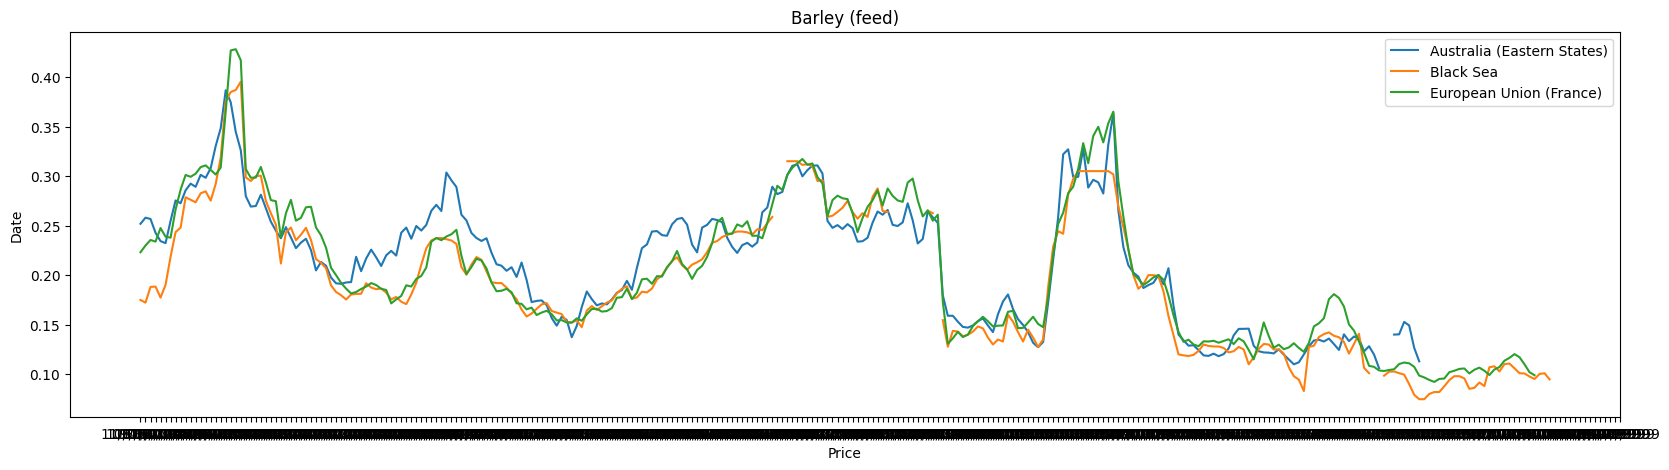

In [49]:
plot_commodity_trends('Barley (feed)')

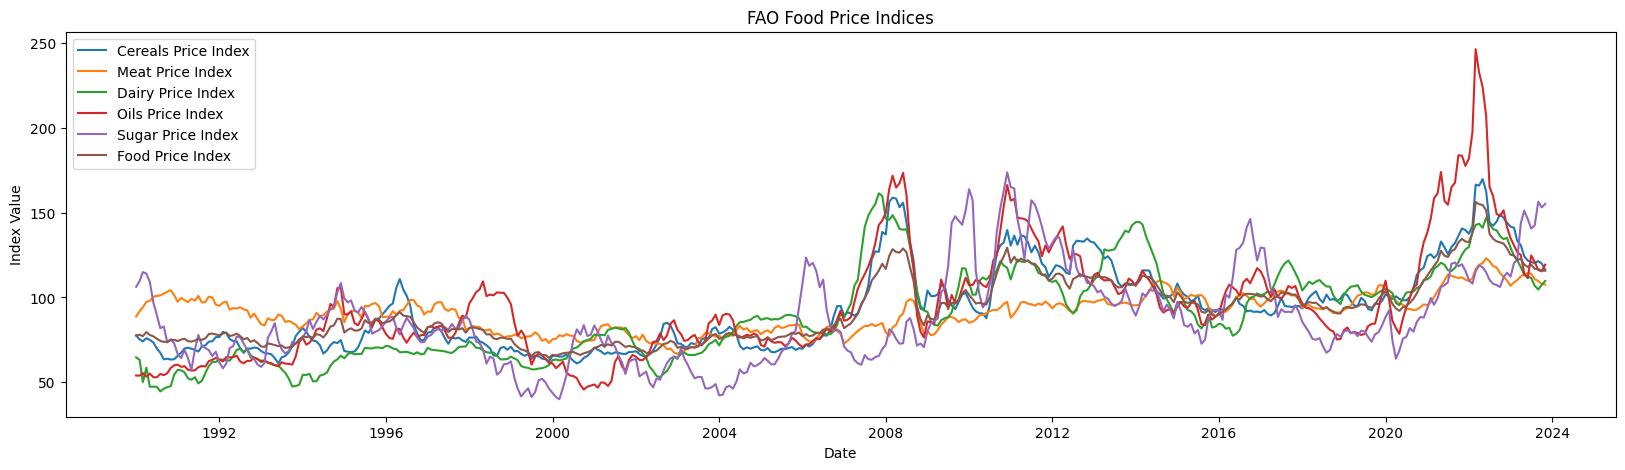

In [40]:
# Plot each of the indices
plt.plot(data_cereal_price_index['Month'], data_cereal_price_index['Cereals Price Index'], label='Cereals Price Index')
plt.plot(data_meat_price_index['Month'], data_meat_price_index['Meat Price Index'], label='Meat Price Index')
plt.plot(data_dairy_price_index['Month'], data_dairy_price_index['Dairy Price Index'], label='Dairy Price Index')
plt.plot(data_oil_price_index['Month'], data_oil_price_index['Oils Price Index'], label='Oils Price Index')
plt.plot(data_sugar_price_index['Month'], data_sugar_price_index['Sugar Price Index'], label='Sugar Price Index')
plt.plot(data_food_price_index['Month'], data_food_price_index['Food Price Index'], label='Food Price Index')

plt.rcParams["figure.figsize"] = (20,5)
plt.title('FAO Food Price Indices')
plt.ylabel('Index Value')
plt.xlabel('Date')
plt.legend()
plt.show()

### Part 2.2: Data Cleaning
Fitting the data visualized above to a trendline and including the residuals as an additional feature. The trendline is a weak trendline following the research paper linked at the top of this section `Part 2`

In [62]:
# Make a line plot of the 'Close' column against the date column with a trendline
days = (data_food_price_index['Month'] - data_food_price_index['Month'].min()).dt.days
slope, intercept = np.polyfit(days, data_food_price_index['Food Price Index'], 1)
trend_line = slope * days + intercept

# Calculate the MAE of the trendline
mae = np.mean(np.abs(data_food_price_index['Food Price Index'] - trend_line))
print('The MAE of the LINEAR trendline is:', mae)

The MAE of the LINEAR trendline is: 10.57162164217724


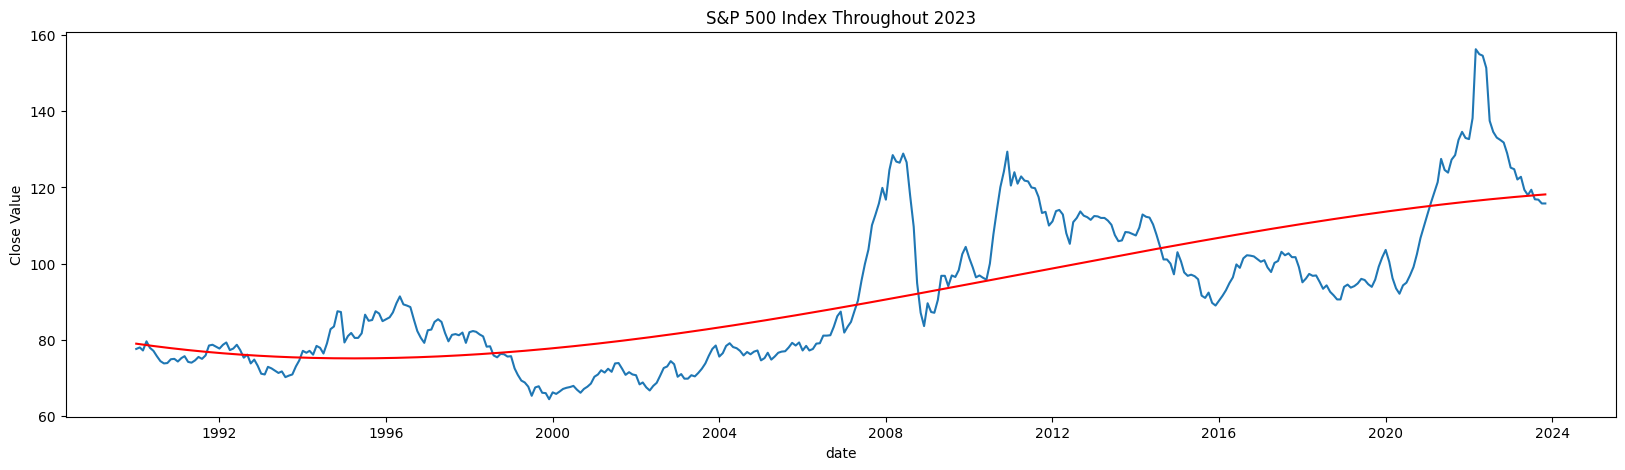

The MAE of the WEAK trendline is: 9.665894316835164


In [63]:
# Make a line plot of the 'Close' column against the date column with a trendline
days = (data_food_price_index['Month'] - data_food_price_index['Month'].min()).dt.days
slope0, slope1, slope2,  intercept = np.polyfit(days, data_food_price_index['Food Price Index'], 3)
trend_line = slope0 * days**3 + slope1 * days**2 + slope2 * days + intercept
plt.plot(data_food_price_index['Month'], data_food_price_index['Food Price Index'], label='Food Price Index')
plt.plot(data_food_price_index['Month'], trend_line, label='Trend Line', color='red')

plt.rcParams["figure.figsize"] = (20,5)
plt.xlabel('date')
plt.ylabel('Close Value')
plt.title('S&P 500 Index Throughout 2023')
plt.show()

# Calculate the MAE of the trendline
mae = np.mean(np.abs(data_food_price_index['Food Price Index'] - trend_line))
print('The MAE of the WEAK trendline is:', mae)


In [79]:
# Save the value of the trendline at each data point in a new column
data_food_price_index['Trend'] = trend_line

# Calculate the residuals by subtracting the trendline from the close value
data_food_price_index['Residuals'] = data_food_price_index['Food Price Index'] - data_food_price_index['Trend']

data_food_price_index.head()


,Year,Date,Food Price Index,Meat Price Index,Dairy Price Index,Cereals Price Index,Oils Price Index,Sugar Price Index,Trend,Residuals
0,1990,1990-01-01,77.6,88.8,64.7,77.6,54.0,106.3,78.982883,-1.382883
1,1990,1990-02-01,78.0,91.9,63.2,75.3,53.9,109.7,78.852301,-0.852301
2,1990,1990-03-01,77.2,94.2,50.1,74.1,55.4,115.0,78.736450,-1.536450
3,1990,1990-04-01,79.6,97.4,58.6,76.0,53.3,114.1,78.610495,0.989505
4,1990,1990-05-01,77.9,98.0,47.4,75.0,55.1,109.3,78.490904,-0.590904


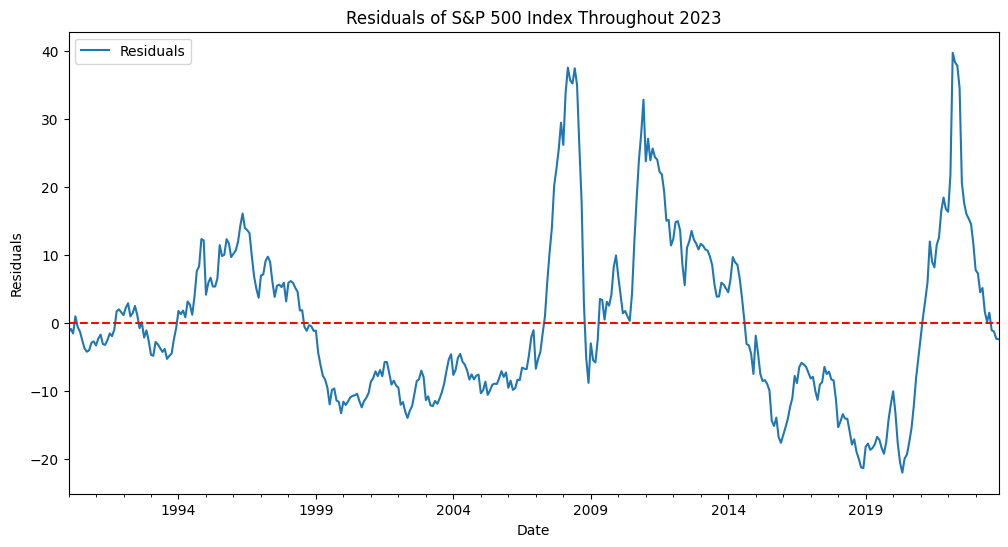

In [80]:
# Plot the residuals against the date column
data_food_price_index.plot(x='Date', y='Residuals', figsize=(12, 6))
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residuals of S&P 500 Index Throughout 2023')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


## Part 3: Statistical Analysis
**Note to Sydney:** This section is all about analyzing the statistical relationships between the different features. I don't know what exact statistical tests you should use, but using statistical tests to determine the relationships between different distributions is basically all what Intro to Data Science is about. I don't have an idea what statistical tests you should use (Chat-GPT is good at that tho lol), but I do have an idea what relationships you should do statistical tests on:
* Normalized Relationship between each price index and the other price indices (how closely do the price indices match each other as the economy changes)
* Look at a few relationships between the prices of different countries for the same commodity (especially for countries in different regions of the world)
* Normalized relationships between some food commodities and their related food index (how closely does the overall index match the price of the commodity as the economy changes)

## Part 4: Machine Learning Output
Compare the performance of your original model you made in Intro to AI to the model you make after this analysis.

In [64]:
# (I recommend using the residuals and the normalized values as possible improvements, as well as what you learn from part 3)